# Activity: Perform feature engineering 

## **Introduction**


As you're learning, data professionals working on modeling projects use featuring engineering to help them determine which attributes in the data can best predict certain measures.

In this activity, you are working for a firm that provides insights to the National Basketball Association (NBA), a professional North American basketball league. You will help NBA managers and coaches identify which players are most likely to thrive in the high-pressure environment of professional basketball and help the team be successful over time.

To do this, you will analyze a subset of data that contains information about NBA players and their performance records. You will conduct feature engineering to determine which features will most effectively predict whether a player's NBA career will last at least five years. The insights gained then will be used in the next stage of the project: building the predictive model.


## **Step 1: Imports** 


Start by importing `pandas`.

In [1]:
# Import pandas.

import numpy as np
import pandas as pd

The dataset is a .csv file named `nba-players.csv`. It consists of performance records for a subset of NBA players. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Save in a variable named `data`.

data = pd.read_csv("nba-players.csv", index_col=0)

<details><summary><h4><strong>Hint 1</strong></h4></summary>

The `read_csv()` function from `pandas` allows you to read in data from a csv file and load it into a DataFrame.
    
</details>

<details><summary><h4><strong>Hint 2</strong></h4></summary>

Call the `read_csv()`, pass in the name of the csv file as a string, followed by `index_col=0` to use the first column from the csv as the index in the DataFrame.
    
</details>

## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of what it entails.

In [3]:
# Display first 10 rows of data.

data.head(10)

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `pandas` library that can be called on a DataFrame to display the first n number of rows, where n is a number of your choice. 
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `head()` function and pass in 10.
</details>

Display the number of rows and the number of columns to get a sense of how much data is available to you.

In [4]:
# Display number of rows, number of columns.
data.shape

(1340, 21)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

DataFrames in `pandas` have an attribute that can be called to get the number of rows and columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

You can call the `shape` attribute.
</details>

**Question:** What do you observe about the number of rows and the number of columns in the data?

There are 1340 rows and 21 columns

Now, display all column names to get a sense of the kinds of metadata available about each player. Use the columns property in pandas.


In [6]:
# Display all column names.
pd.set_option('display.max_columns', None)
data.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


The following table provides a description of the data in each column. This metadata comes from the data source, which is listed in the references section of this lab.

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goals attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

Next, display a summary of the data to get additional information about the DataFrame, including the types of data in the columns.

In [7]:
# Use .info() to display a summary of the DataFrame.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1340 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

**Question:** Based on the preceding tables, which columns are numerical and which columns are categorical?

`name` is categorical and the others are `numerical`

### Check for missing values

Now, review the data to determine whether it contains any missing values. Begin by displaying the number of missing values in each column. After that, use isna() to check whether each value in the data is missing. Finally, use sum() to aggregate the number of missing values per column.


In [11]:
# Display the number of missing values in each column.
# Check whether each value is missing.
#Aggregate the number of missing values per column.

data.isna().sum(axis=0)

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

**Question:** What do you observe about the missing values in the columns? 

There is no missing values in the dataset.

**Question:** Why is it important to check for missing values?

Missing values can have a significant impact on the accuracy and performance of machine learning models. If a model is trained on a data set that contains missing values, the model may learn to ignore those values, which can lead to inaccurate predictions.

## **Step 3: Statistical tests** 



Next, use a statistical technique to check the class balance in the data. To understand how balanced the dataset is in terms of class, display the percentage of values that belong to each class in the target column. In this context, class 1 indicates an NBA career duration of at least five years, while class 0 indicates an NBA career duration of less than five years.

In [15]:
# Display percentage (%) of values for each class (1, 0) represented in the target column of this dataset.

data['target_5yrs'].value_counts(normalize=True).to_frame()

,target_5yrs
1,0.620149
0,0.379851


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

In `pandas`, `value_counts(normalize=True)` can be used to calculate the frequency of each distinct value in a specific column of a DataFrame.  
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

After `value_counts(normalize=True)`, multipling by `100` converts the frequencies into percentages (%).
</details>

**Question:** What do you observe about the class balance in the target column?

The class balance in the target column is unbalanced. This means that there are more instances of the majority class (1) than there are instances of the minority class (0). In this case, the majority class has a ratio of 62.01% to the minority class, which has a ratio of 37.99%.

However this ratio is acceptable and no need to rebalance.

**Question:** Why is it important to check class balance?

When a class is imbalanced, there are more instances of one class than there are of another class. This can lead to models that are biased towards the majority class, and it can make it difficult to detect the minority class.

## **Step 4: Results and evaluation** 


Now, perform feature engineering, with the goal of identifying and creating features that will serve as useful predictors for the target variable, `target_5yrs`. 

### Feature selection

The following table contains descriptions of the data in each column:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

**Question:** Which columns would you select and avoid selecting as features, and why? Keep in mind the goal is to identify features that will serve as useful predictors for the target variable, `target_5yrs`. 

**Select as Features**:
1. `gp`: Number of games played could be a significant indicator of a player's career duration. Players with more games played are likely to have longer careers.
2. `pts`: Average points per game is an important scoring metric that may reflect a player's overall performance and contribution to the team, which could affect their career duration.
3. `fg`: There are three different metrics that give information about field goals. The percent of field goals a player makes (fg) says more about their performance than the number of field goals they make (fgm) or the number of field goals they attempt (fga). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players.
4. `3p` & `ft`: The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made.
5. `reb`: Average number of rebounds per game can indicate a player's ability to contribute to both offensive and defensive plays, which may influence their longevity in the league. Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature.
6. `ast`, `stl`, `blk`, `tov`: average number of assists, steals, blocks, and turnovers per game also provide informatino about how well a player is performing in a game so should be included as well.
7. `min`: Number of minutes played could be indicative of a player's importance to the team and their ability to stay on the court, potentially affecting their career duration.

**Avoid Selecting as Features**:
1. `name`: The name of the NBA player is not likely to have any direct influence on their career duration and may introduce noise to the model.
2. `fgm`, `fga`, `3p_made`, `3pa`, `ftm`, `fta`, `oreb`, `dreb`: These columns are related to various shooting, free throw, and rebounding metrics. While they may be relevant to a player's performance, they are already captured to some extent by other selected features like "pts," "reb," and "ast." Including all these metrics might introduce multicollinearity and unnecessary complexity to the model.

Next, select the columns you want to proceed with. Make sure to include the target column, `target_5yrs`. Display the first few rows to confirm they are as expected.

In [16]:
# Select the columns to proceed with and save the DataFrame in new variable `selected_data`.
# Include the target column, `target_5yrs`.

selected_data = data[['gp','min','pts','fg','3p','ft','reb','ast','stl','blk','tov', "target_5yrs"]]


# Display the first few rows.

selected_data.head()



,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature selection and selecting a subset of a DataFrame.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use two pairs of square brackets, and place the names of the columns you want to select inside the innermost brackets. 

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

There is a function in `pandas` that can be used to display the first few rows of a DataFrame. Make sure to specify the column names with spelling that matches what's in the data. Use quotes to represent each column name as a string. 
</details>

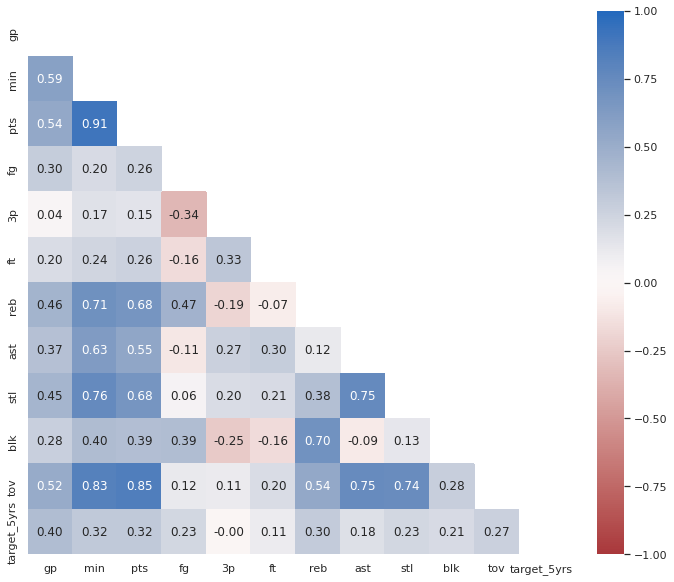

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
corr = selected_data.corr()
mask = np.triu(corr)
plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='vlag_r', vmin=-1, vmax=1, fmt='.2f');

### Feature transformation

An important aspect of feature transformation is feature encoding. If there are categorical columns that you would want to use as features, those columns should be transformed to be numerical. This technique is also known as feature encoding.

**Question:** Why is feature transformation important to consider? Are there any transformations necessary for the features you want to use?

There are a number of reasons why feature transformation can be important:

* **To improve the accuracy of the model:** Feature transformation can help to improve the accuracy of machine learning models by making the features more compatible with the learning algorithm. For example, if a machine learning algorithm is based on linear regression, then the features should be transformed to be on a similar scale.
* **To improve the interpretability of the model:** Feature transformation can also help to improve the interpretability of machine learning models by making the features more understandable. For example, if a feature is transformed to be on a scale of 0 to 1, then it is easier to understand the meaning of the feature.
* **To remove outliers:** Feature transformation can also be used to remove outliers from the data. Outliers can negatively impact the accuracy of machine learning models, so it is important to remove them.

There are a number of different feature transformation techniques that can be used. Some common techniques include:

* **Normalization:** This involves transforming the features to have a mean of 0 and a standard deviation of 1.
* **Standardization:** This involves transforming the features to have a mean of 0 and a variance of 1.
* **Log transformation:** This involves taking the logarithm of the features. This can be useful for features that are skewed.
* **Box-cox transformation:** This is a more general transformation that can be used for features that are not normally distributed.

### Feature extraction

Display the first few rows containing containing descriptions of the data for reference. The table is as follows:

<center>

|Column Name|Column Description|
|:---|:-------|
|`name`|Name of NBA player|
|`gp`|Number of games played|
|`min`|Number of minutes played per game|
|`pts`|Average number of points per game|
|`fgm`|Average number of field goals made per game|
|`fga`|Average number of field goal attempts per game|
|`fg`|Average percent of field goals made per game|
|`3p_made`|Average number of three-point field goals made per game|
|`3pa`|Average number of three-point field goal attempts per game|
|`3p`|Average percent of three-point field goals made per game|
|`ftm`|Average number of free throws made per game|
|`fta`|Average number of free throw attempts per game|
|`ft`|Average percent of free throws made per game|
|`oreb`|Average number of offensive rebounds per game|
|`dreb`|Average number of defensive rebounds per game|
|`reb`|Average number of rebounds per game|
|`ast`|Average number of assists per game|
|`stl`|Average number of steals per game|
|`blk`|Average number of blocks per game|
|`tov`|Average number of turnovers per game|
|`target_5yrs`|1 if career duration >= 5 yrs, 0 otherwise|

</center>

In [34]:
# Display the first few rows of `selected_data` for reference.

selected_data.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1


**Question:** Which columns lend themselves to feature extraction?

The `gp`, `pts`, `min` columns lend themselves to feature extraction.
- `ttp` = total games `gp` * average number of points in a game `pts`. This represents the total number of points the player has earned. ttp = total points

- `eff` = `total_points`/ `min`. Points earn per minute. eff = efficiency

Extract two features that you think would help predict `target_5yrs`. Then, create a new variable named 'extracted_data' that contains features from 'selected_data', as well as the features being extracted.

In [37]:
# Extract two features that would help predict target_5yrs.
# Create a new variable named `extracted_data`.

extracted_data = selected_data.copy()

extracted_data['ttp'] = extracted_data['gp'] * extracted_data['pts']


extracted_data['eff'] = round(extracted_data['ttp'] / extracted_data['min'],2)

extracted_data.head()


,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,ttp,eff
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.72
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.37
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.15
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.50
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.78


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature extraction.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function `copy()` to make a copy of a DataFrame. To access a specific column from a DataFrame, use a pair of square brackets and place the name of the column as a string inside the brackets.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use a pair of square brackets to create a new column in a DataFrame. The columns in DataFrames are series objects, which support elementwise operations such as multiplication and division. Be sure the column names referenced in your code match the spelling of what's in the DataFrame.
</details>

Now, to prepare for the Naive Bayes model that you will build in a later lab, clean the extracted data and ensure ensure it is concise. Naive Bayes involves an assumption that features are independent of each other given the class. In order to satisfy that criteria, if certain features are aggregated to yield new features, it may be necessary to remove those original features. Therefore, drop the columns that were used to extract new features.

**Note:** There are other types of models that do not involve independence assumptions, so this would not be required in those instances. In fact, keeping the original features may be beneficial.

In [38]:
# Remove any columns from `extracted_data` that are no longer needed.

extracted_data = extracted_data.drop(columns=["gp", "pts", "min"])


# Display the first few rows of `extracted_data` to ensure that column drops took place.


extracted_data.head()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,ttp,eff
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.72
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.37
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.15
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.50
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.78


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the materials about feature extraction.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There are functions in the `pandas` library that remove specific columns from a DataFrame and that display the first few rows of a DataFrame.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `drop()` function and pass in a list of the names of the columns you want to remove. By default, calling this function will result in a new DataFrame that reflects the changes you made. The original DataFrame is not automatically altered. You can reassign `extracted_data` to the result, in order to update it. 

Use the `head()` function to display the first few rows of a DataFrame.
</details>

Next, export the extracted data as a new .csv file. You will use this in a later lab. 

In [39]:
# Export the extracted data.

extracted_data.to_csv("extracted_nba_players_data.csv", index=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `pandas` library that exports a DataFrame as a .csv file. 
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `to_csv()` function to export the DataFrame as a .csv file. 
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `to_csv()` function on `extracted_data`, and pass in the name that you want to give to the resulting .csv file. Specify the file name as a string and in the file name. Make sure to include `.csv` as the file extension. Also, pass in the parameter `index` set to `0`, so that when the export occurs, the row indices from the DataFrame are not treated as an additional column in the resulting file. 
</details>

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you followed and what tasks were performed during each step, as well as important priorities when training data.**

- It is important to check for class balance in a dataset, particularly in the context of feature engineering and predictive modeling. If the target column in a dataset has more than 90% of its values belonging to one class, it is recommended to redistribute the data; otherwise, once a model is trained on the imbalanced data and predictions are made, the predictions may be biased. 
- Feature selection involves choosing features that help predict the target variable and removing columns that may not be helpful for prediction. In this process, and throughout feature engineering, it is important to make ethical considerations.  
- Feature transformation involves transforming features so that they are more usable for future modeling purposes, which includes encoding categorical features to turn them into numerical features. 
- Feature extraction involves combining existing columns meaningfully to construct new features that would help improve prediction. 

**What summary would you provide to stakeholders? Consider key attributes to be shared from the data, as well as upcoming project plans.**


- The following attributes about player performance could help predict their NBA career duration and should be included in a presentation to stakeholders: field goals, three-point field goals, free throws, rebounds, assists, steals, blocks, turnovers, total points, and efficiency as points per minute. 
- It would be important to explain that these attributes, along with a relevant dataset, will be used in the next stage of the project. At that point, a model will be built to predict a player's career duration. Insights gained will be shared with stakeholders once the project is complete. Stakeholders would also appreciate being provided with a timeline and key deliverables that they can expect to receive.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.